# Before extract feature

## import library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np
from lightgbm import LGBMClassifier

file_name = "ignore_dir/hepatitis+c+virus+hcv+for+egyptian+patients/HCV-Egy-Data.csv" 
print(f"Attempting to load data from uploaded file: {file_name}")
data = pd.read_csv(file_name)
print("Dataset loaded successfully.")
target_column = 'Baselinehistological staging'
print(f"\nUsing target column: '{target_column}'")
print("Target Class Distribution:")
print(data[target_column].value_counts(normalize=True).sort_index())

Attempting to load data from uploaded file: ignore_dir/hepatitis+c+virus+hcv+for+egyptian+patients/HCV-Egy-Data.csv
Dataset loaded successfully.

Using target column: 'Baselinehistological staging'
Target Class Distribution:
Baselinehistological staging
1    0.242599
2    0.239711
3    0.256318
4    0.261372
Name: proportion, dtype: float64


## Split train/test and set type columns

In [3]:
y = data[target_column]
X = data.drop(target_column, axis=1)
categorical_features = [
    'Gender', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 
    'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ', 'Baseline histological Grading'
]
numerical_features = [
    'Age ', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 
    'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 
    'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF'
]
actual_columns = set(X.columns)
numerical_features = [col for col in numerical_features if col in actual_columns]
categorical_features = [col for col in categorical_features if col in actual_columns]

print(f"\nUsing {len(numerical_features)} numerical features.")
print(f"Using {len(categorical_features)} categorical features.")

print("\nSplitting data into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Using 19 numerical features.
Using 9 categorical features.

Splitting data into training and testing sets (80/20)...
Training features shape: (1108, 28)
Testing features shape: (277, 28)


## Pipeline model and data transform 

In [4]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42, 
        n_estimators=100,
        class_weight='balanced'
    ))
])
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LGBMClassifier(
#         random_state=42,
#         class_weight='balanced'
#     ))
# ])

## fit and evaluation

In [5]:
print("Training the model...")
rf_pipeline.fit(X_train, y_train)
print("Model training complete.")
print("\nEvaluating model on the test set...")
y_pred = rf_pipeline.predict(X_test)

print("\n--- Classification Report ---")
target_names = ['Stage 1 (F1)', 'Stage 2 (F2)', 'Stage 3 (F3)', 'Stage 4 (F4)']
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
filtered_target_names = [target_names[i-1] for i in sorted(unique_labels)]

report = classification_report(
    y_test, 
    y_pred, 
    target_names=filtered_target_names, 
    labels=sorted(unique_labels)
)
print(report)

Training the model...
Model training complete.

Evaluating model on the test set...

--- Classification Report ---
              precision    recall  f1-score   support

Stage 1 (F1)       0.25      0.27      0.26        67
Stage 2 (F2)       0.24      0.22      0.23        67
Stage 3 (F3)       0.28      0.30      0.29        71
Stage 4 (F4)       0.36      0.35      0.35        72

    accuracy                           0.29       277
   macro avg       0.28      0.28      0.28       277
weighted avg       0.29      0.29      0.29       277



# Apply feature extraction followed by paper 
on table 1 https://ieeexplore.ieee.org/document/8289800

In [6]:
import pandas as pd
import numpy as np
import os

## load and check distibution dataset

In [7]:
file_name = "ignore_dir/hepatitis+c+virus+hcv+for+egyptian+patients/HCV-Egy-Data.csv" 
data = pd.read_csv(file_name)
target_column = 'Baselinehistological staging'
print(f"Using target column: '{target_column}'")
print("Target Class Distribution:")
print(data[target_column].value_counts(normalize=True).sort_index())

Using target column: 'Baselinehistological staging'
Target Class Distribution:
Baselinehistological staging
1    0.242599
2    0.239711
3    0.256318
4    0.261372
Name: proportion, dtype: float64


## Extract data

In [8]:
data.rename(columns={
        'Age ': 'Age', 
        'Headache ': 'Headache', 
        'Diarrhea ': 'Diarrhea', 
        'Fatigue & generalized bone ache ': 'Fatigue & generalized bone ache',
        'Jaundice ': 'Jaundice',
        'Epigastric pain ': 'Epigastric pain',
        'ALT4': 'ALT 4'
    }, inplace=True)
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT 4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

### Age

In [9]:
conditions = [
        (data['Age'] <= 32),
        (data['Age'] > 32) & (data['Age'] <= 37),
        (data['Age'] > 37) & (data['Age'] <= 42),
        (data['Age'] > 42) & (data['Age'] <= 47),
        (data['Age'] > 47) & (data['Age'] <= 52),
        (data['Age'] > 52) & (data['Age'] <= 57),
        (data['Age'] > 57) & (data['Age'] <= 62),
    ]
choices = [0, 1, 2, 3, 4, 5, 6]
data['Age_Category'] = np.select(conditions, choices, default=-1)
data[['Age', 'Age_Category']].sample(3)

,Age,Age_Category
283,42,2
1164,55,5
1353,34,1


### BMI

In [10]:
conditions = [
        (data['BMI'] < 18.5),
        (data['BMI'] >= 18.5) & (data['BMI'] < 25),
        (data['BMI'] >= 25) & (data['BMI'] < 30),
        (data['BMI'] >= 30) & (data['BMI'] < 35),
        (data['BMI'] >= 35) & (data['BMI'] < 40),
    ]
choices = [0, 1, 2, 3, 4]
data['BMI_Category'] = np.select(conditions, choices, default=-1)
data[['BMI', 'BMI_Category']].sample(3)

,BMI,BMI_Category
8,23,1
1058,22,1
572,29,2


### WBC (White blood cell)

In [11]:
conditions = [
        (data['WBC'] < 4000),
        (data['WBC'] >= 4000) & (data['WBC'] < 11000),
        (data['WBC'] >= 11000),
    ]
choices = [0, 1, 2]
data['WBC_Category'] = np.select(conditions, choices, default=-1)
data[['WBC', 'WBC_Category']].sample(3)

,WBC,WBC_Category
1322,3007,0
185,5859,1
883,4818,1


### RBC (Red blood cell)

In [12]:
conditions = [
        (data['RBC'] < 3000000),
        (data['RBC'] >= 3000000) & (data['RBC'] < 5000000),
        (data['RBC'] >= 5000000),
    ]
choices = [0, 1, 2]
data['RBC_Category'] = np.select(conditions, choices, default=-1)
data[['RBC', 'RBC_Category']].sample(3)

,RBC,RBC_Category
626,5011007.0,2
65,4731084.0,1
1376,4453055.0,1


### HGB (Hemoglobin)

In [13]:
conditions = [
        (data['Gender'] == 1) & (data['HGB'] < 14),
        (data['Gender'] == 1) & (data['HGB'] >= 14) & (data['HGB'] < 17.5),
        (data['Gender'] == 1) & (data['HGB'] >= 17.5),
        (data['Gender'] == 2) & (data['HGB'] < 12.3),
        (data['Gender'] == 2) & (data['HGB'] >= 12.3) & (data['HGB'] < 15.3),
        (data['Gender'] == 2) & (data['HGB'] >= 15.3),
    ]
choices = [1, 2, 3, -1, -2, -3]
data['HGB_Category'] = np.select(conditions, choices, default=10)
data[['Gender', 'HGB', 'HGB_Category']].sample(3)

,Gender,HGB,HGB_Category
739,2,11,-1
393,2,14,-2
379,2,14,-2


### Plat (Platelet)

In [14]:
conditions = [
        (data['Plat'] < 100000),
        (data['Plat'] >= 100000) & (data['Plat'] < 255000),
        (data['Plat'] >= 255000),
    ]
choices = [0, 1, 2]
data['Plat_Category'] = np.select(conditions, choices, default=-1)
data[['Plat', 'Plat_Category']].sample(3)

,Plat,Plat_Category
987,199856.0,1
1236,97842.0,0
1325,178928.0,1


### AST(aspartate) 1 and ALT(alanine) 1, 4, 12, 24, 36, 48, after 24 w

In [15]:
conditions = [
        (data['AST 1'] < 20),
        (data['AST 1'] >= 20) & (data['AST 1'] < 40),
        (data['AST 1'] >= 40),
    ]
choices = [0, 1, 2]
data['AST 1_Category'] = np.select(conditions, choices, default=-1)
data[['AST 1', 'AST 1_Category']].sample(3)

,AST 1,AST 1_Category
1106,86,2
274,100,2
1290,77,2


In [16]:
conditions = [
        (data['ALT 1'] < 20),
        (data['ALT 1'] >= 20) & (data['ALT 1'] < 40),
        (data['ALT 1'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 1_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 1', 'ALT 1_Category']].sample(3)

,ALT 1,ALT 1_Category
248,77,2
501,39,1
300,81,2


In [17]:
conditions = [
        (data['ALT 4'] < 20),
        (data['ALT 4'] >= 20) & (data['ALT 4'] < 40),
        (data['ALT 4'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 4_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 4', 'ALT 4_Category']].sample(3)

,ALT 4,ALT 4_Category
221,119.0,2
580,51.0,2
722,107.0,2


In [18]:
conditions = [
        (data['ALT 12'] < 20),
        (data['ALT 12'] >= 20) & (data['ALT 12'] < 40),
        (data['ALT 12'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 12_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 12', 'ALT 12_Category']].sample(3)

,ALT 12,ALT 12_Category
929,113,2
841,118,2
858,63,2


In [19]:
conditions = [
        (data['ALT 24'] < 20),
        (data['ALT 24'] >= 20) & (data['ALT 24'] < 40),
        (data['ALT 24'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 24_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 24', 'ALT 24_Category']].sample(3)

,ALT 24,ALT 24_Category
569,84,2
223,51,2
1274,50,2


In [20]:
conditions = [
        (data['ALT 36'] < 20),
        (data['ALT 36'] >= 20) & (data['ALT 36'] < 40),
        (data['ALT 36'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 36_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 36', 'ALT 36_Category']].sample(3)

,ALT 36,ALT 36_Category
128,73,2
329,49,2
1285,64,2


In [21]:
conditions = [
        (data['ALT 48'] < 20),
        (data['ALT 48'] >= 20) & (data['ALT 48'] < 40),
        (data['ALT 48'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT 48_Category'] = np.select(conditions, choices, default=-1)
data[['ALT 48', 'ALT 48_Category']].sample(3)

,ALT 48,ALT 48_Category
525,98,2
1333,50,2
1106,89,2


In [22]:
conditions = [
        (data['ALT after 24 w'] < 20),
        (data['ALT after 24 w'] >= 20) & (data['ALT after 24 w'] < 40),
        (data['ALT after 24 w'] >= 40),
    ]
choices = [0, 1, 2]
data['ALT after 24 w_Category'] = np.select(conditions, choices, default=-1)
data[['ALT after 24 w', 'ALT after 24 w_Category']].sample(3)

,ALT after 24 w,ALT after 24 w_Category
233,25,1
1062,27,1
935,24,1


### RNA Base, 4, 12, EOT, EF

In [23]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT 4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging',
       'Age_Category', 'BMI_Category', 'WBC_Category', 'RBC_Category',
       'HGB_Category', 'Plat_Category', 'AST 1_Category', 'ALT 1_Category',
       'ALT 4_Category', 'ALT 12_Category', 'ALT 24_Category',
       'ALT 36_Category', 'ALT 48_Category', 'ALT after 24 w_Category'],
      dtype='object')

In [24]:
conditions = [
        (data['RNA Base'] <= 5),
        (data['RNA Base'] > 5),
    ]
choices = [0, 1]
data['RNA Base_Category'] = np.select(conditions, choices, default=-1)
data[['RNA Base', 'RNA Base_Category']].sample(3)

,RNA Base,RNA Base_Category
557,674758,1
363,1059627,1
130,325264,1


In [25]:
conditions = [
        (data['RNA 4'] <= 5),
        (data['RNA 4'] > 5),
    ]
choices = [0, 1]
data['RNA 4_Category'] = np.select(conditions, choices, default=-1)
data[['RNA 4', 'RNA 4_Category']].sample(3)

,RNA 4,RNA 4_Category
437,265428,1
1187,1040139,1
109,867825,1


In [26]:
conditions = [
        (data['RNA 12'] <= 5),
        (data['RNA 12'] > 5),
    ]
choices = [0, 1]
data['RNA 12_Category'] = np.select(conditions, choices, default=-1)
data[['RNA 12', 'RNA 12_Category']].sample(3)

,RNA 12,RNA 12_Category
255,529497,1
553,82074,1
1355,492737,1


In [27]:
conditions = [
        (data['RNA EOT'] <= 5),
        (data['RNA EOT'] > 5),
    ]
choices = [0, 1]
data['RNA EOT_Category'] = np.select(conditions, choices, default=-1)
data[['RNA EOT', 'RNA EOT_Category']].sample(3)

,RNA EOT,RNA EOT_Category
1264,326349,1
489,66322,1
103,82400,1


In [28]:
conditions = [
        (data['RNA EF'] <= 5),
        (data['RNA EF'] > 5),
    ]
choices = [0, 1]
data['RNA EF_Category'] = np.select(conditions, choices, default=-1)
data[['RNA EF', 'RNA EF_Category']].sample(3)

,RNA EF,RNA EF_Category
504,122552,1
824,381513,1
943,92591,1


### save to csv

In [29]:
output_folder = './extracted_data'
os.makedirs(output_folder, exist_ok=True)
data.to_csv(os.path.join(output_folder, 'combine_numeric_category.csv'), index=False)

In [30]:
category_data = data.copy()
category_data.drop([
    'Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat','AST 1', 'ALT 1',
    'ALT 4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
    'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF'
  ], axis=1, inplace=True)
output_folder = './extracted_data'
os.makedirs(output_folder, exist_ok=True)
category_data.to_csv(os.path.join(output_folder, 'category_only.csv'), index=False)
category_data.sample(5)

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,Baseline histological Grading,Baselinehistological staging,...,ALT 12_Category,ALT 24_Category,ALT 36_Category,ALT 48_Category,ALT after 24 w_Category,RNA Base_Category,RNA 4_Category,RNA 12_Category,RNA EOT_Category,RNA EF_Category
493,2,2,1,2,1,2,1,2,5,3,...,2,2,2,2,1,1,1,1,1,1
712,2,1,2,1,2,1,2,2,16,1,...,2,2,2,2,1,1,1,0,0,0
795,2,1,1,2,2,1,1,1,11,2,...,2,2,2,2,1,1,1,0,0,0
113,2,1,2,1,1,1,2,2,11,1,...,2,2,2,2,1,1,1,1,1,1
973,2,2,1,1,2,2,2,1,15,1,...,2,2,2,2,1,1,1,1,1,1


## Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np

### Split train/test

In [32]:
data = pd.read_csv('extracted_data/category_only.csv')
# data = pd.read_csv('extracted_data/combine_numeric_category.csv')
target_column = 'Baselinehistological staging'
y = data[target_column]
X = data.drop([target_column, 'Baseline histological Grading'], axis=1)

print("\nSplitting data into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Splitting data into training and testing sets (80/20)...
Training features shape: (1108, 27)
Testing features shape: (277, 27)


### Model training

In [33]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
# model = Pipeline(steps=[
#     ('preprocessor', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
#     ('classifier', RandomForestClassifier(
#         random_state=42, 
#         n_estimators=100,
#         class_weight='balanced'
#     ))
# ])
# model = MLPClassifier(solver='adam', alpha=4e-5, hidden_layer_sizes=(100, 50, 40, 10, 8), random_state=42, max_iter=1000)
# model = LGBMClassifier()
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nClassification Report")
target_names = ['Stage 1 (F1)', 'Stage 2 (F2)', 'Stage 3 (F3)', 'Stage 4 (F4)']
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
filtered_target_names = [target_names[i-1] for i in sorted(unique_labels)]

report = classification_report(
    y_test, 
    y_pred, 
    target_names=filtered_target_names, 
    labels=sorted(unique_labels)
)
print(report)


Classification Report
              precision    recall  f1-score   support

Stage 1 (F1)       0.20      0.22      0.21        67
Stage 2 (F2)       0.19      0.19      0.19        67
Stage 3 (F3)       0.25      0.23      0.24        71
Stage 4 (F4)       0.28      0.28      0.28        72

    accuracy                           0.23       277
   macro avg       0.23      0.23      0.23       277
weighted avg       0.23      0.23      0.23       277



In [40]:
model.feature_importances_

array([0.02442435, 0.05365017, 0.05389486, 0.06397442, 0.05633701,
       0.06201282, 0.05268357, 0.04908276, 0.16686403, 0.10426706,
       0.06510533, 0.00836131, 0.08068094, 0.01758447, 0.00560049,
       0.00600016, 0.00531418, 0.0066054 , 0.00616559, 0.0083633 ,
       0.00543521, 0.04746317, 0.        , 0.00034963, 0.01737303,
       0.01603069, 0.01637604])

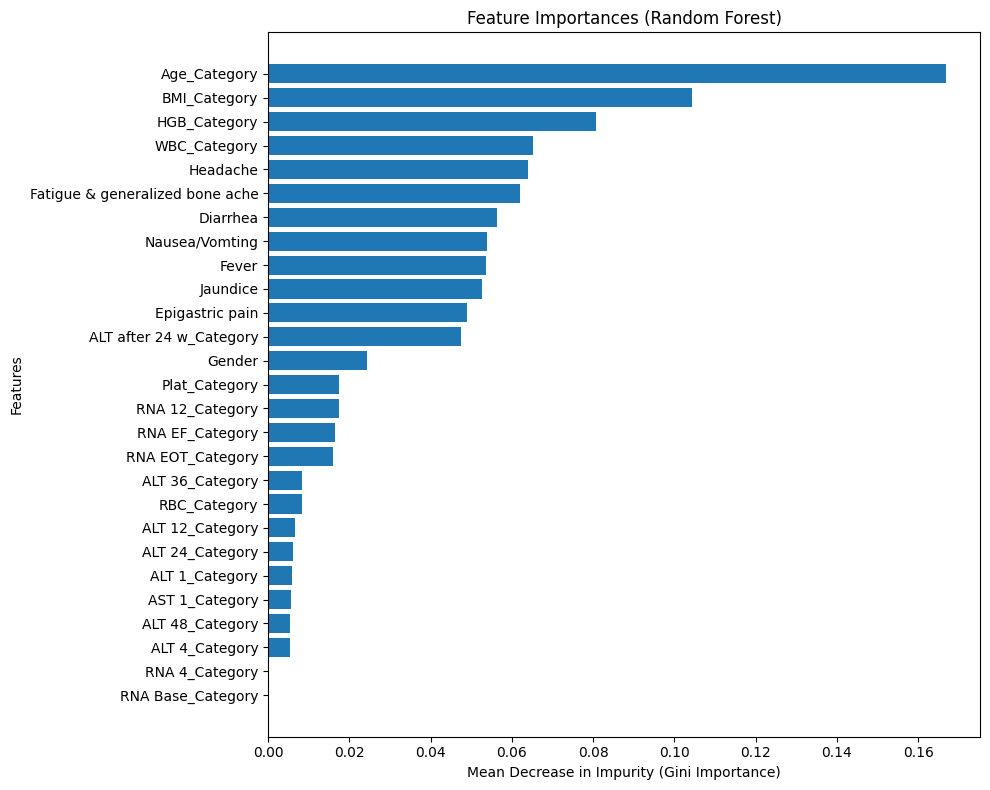

In [39]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances = forest_importances.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(forest_importances.index, forest_importances.values)
ax.set_title("Feature Importances (Random Forest)")
ax.set_xlabel("Mean Decrease in Impurity (Gini Importance)")
ax.set_ylabel("Features")

# ปรับ layout ให้สวยงาม
fig.tight_layout()

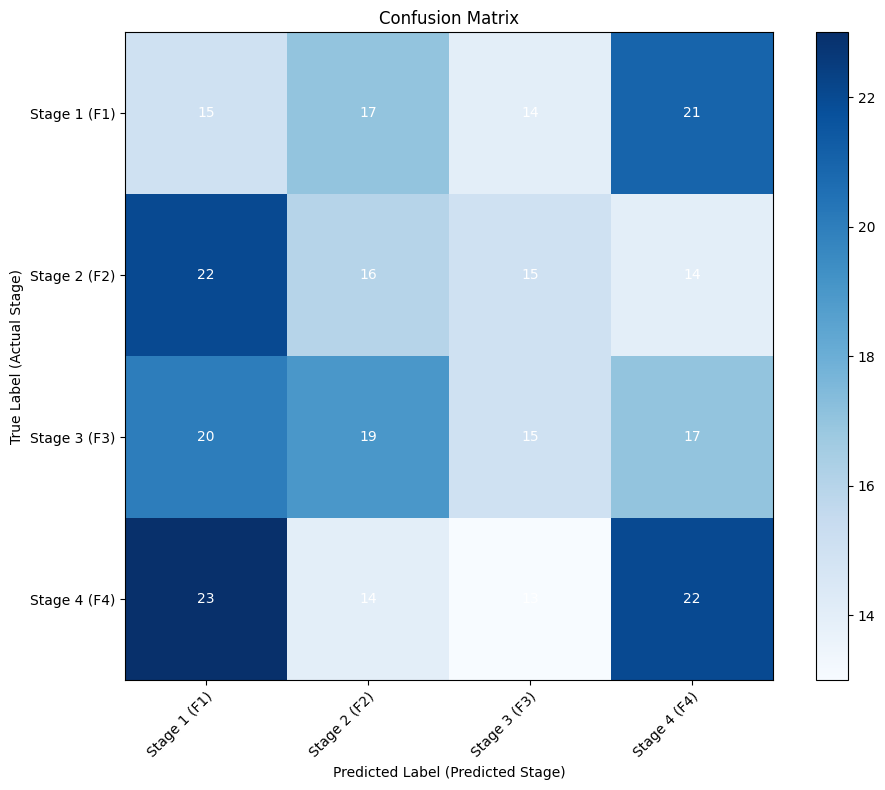

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=sorted(unique_labels))
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=filtered_target_names,
    yticklabels=filtered_target_names,
    title='Confusion Matrix',
    ylabel='True Label (Actual Stage)',
    xlabel='Predicted Label (Predicted Stage)'
)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], 'd'),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )
fig.tight_layout()